In [2]:
import pandas as pd
#import ydata_profiling as yp
# data preprocessing
from sklearn.preprocessing import StandardScaler
# data splitting
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [8]:
data = pd.read_csv("/home/cloud/Datasets/Hotel Reservations.csv")

In [10]:
data.head(10)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
5,INN00006,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,2018,9,13,Online,0,0,0,115.00,1,Canceled
6,INN00007,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,2017,10,15,Online,0,0,0,107.55,1,Not_Canceled
7,INN00008,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,2018,12,26,Online,0,0,0,105.61,1,Not_Canceled
8,INN00009,3,0,0,4,Meal Plan 1,0,Room_Type 1,121,2018,7,6,Offline,0,0,0,96.90,1,Not_Canceled
9,INN00010,2,0,0,5,Meal Plan 1,0,Room_Type 4,44,2018,10,18,Online,0,0,0,133.44,3,Not_Canceled


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [14]:
print(data.isnull().sum())

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64


In [16]:
for col in data.columns:
    print(col)
    print(data[col].unique())
    print('\n')

Booking_ID
['INN00001' 'INN00002' 'INN00003' ... 'INN36273' 'INN36274' 'INN36275']


no_of_adults
[2 1 3 0 4]


no_of_children
[ 0  2  1  3 10  9]


no_of_weekend_nights
[1 2 0 4 3 6 5 7]


no_of_week_nights
[ 2  3  1  4  5  0 10  6 11  7 15  9 13  8 14 12 17 16]


type_of_meal_plan
['Meal Plan 1' 'Not Selected' 'Meal Plan 2' 'Meal Plan 3']


required_car_parking_space
[0 1]


room_type_reserved
['Room_Type 1' 'Room_Type 4' 'Room_Type 2' 'Room_Type 6' 'Room_Type 5'
 'Room_Type 7' 'Room_Type 3']


lead_time
[224   5   1 211  48 346  34  83 121  44   0  35  30  95  47 256  99  12
 122   2  37 130  60  56   3 107  72  23 289 247 186  64  96  41  55 146
  32  57   7 124 169   6  51  13 100 139 117  39  86  19 192 179  26  74
 143 177  18 267 155  46 128  20  40 196 188  17 110  68  73  92 171 134
 320 118 189  16  24   8  10 182 116 123 105 443 317 286 148  14  85  25
  28  80  11 162  82  27 245 266 112  88  69 273   4  97  31  62 197 280
 185 160 104  22 292 109 126 303  81  54  15 161 1

In [18]:
data.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [20]:
data['no_of_adults'].value_counts()

no_of_adults
2    26108
1     7695
3     2317
0      139
4       16
Name: count, dtype: int64

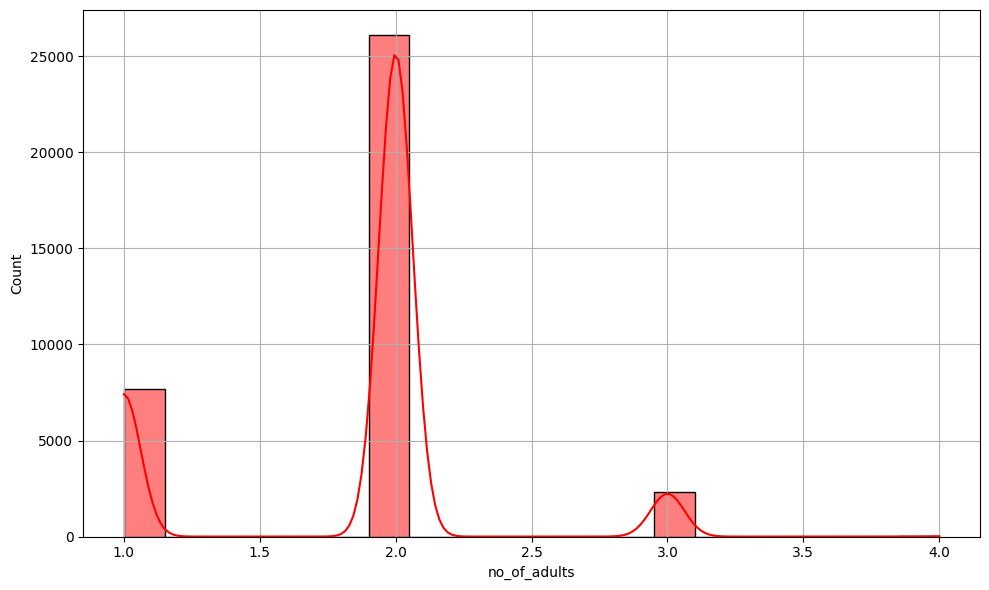

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
data2=data['no_of_adults'].dropna()
data2=data2[data2>0]
plt.figure(figsize=(10,6))
sns.histplot(data2,kde=True, bins=20, color='red')
plt.grid(True)
plt.tight_layout()
plt.show()

In [24]:
data.no_of_adults.hist()

<Axes: >

In [26]:
print(data['type_of_meal_plan'].value_counts())

type_of_meal_plan
Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: count, dtype: int64


In [28]:
print(data['room_type_reserved'].value_counts())

room_type_reserved
Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: count, dtype: int64


In [30]:
print(data['market_segment_type'].value_counts())

market_segment_type
Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: count, dtype: int64


In [32]:
print(data['booking_status'].value_counts())

booking_status
Not_Canceled    24390
Canceled        11885
Name: count, dtype: int64


In [34]:
print(data['required_car_parking_space'].value_counts())

required_car_parking_space
0    35151
1     1124
Name: count, dtype: int64


In [36]:
print(data['repeated_guest'].value_counts())

repeated_guest
0    35345
1      930
Name: count, dtype: int64


In [38]:
print(data['arrival_year'].value_counts())

arrival_year
2018    29761
2017     6514
Name: count, dtype: int64


In [40]:
print(data['arrival_month'].value_counts())

arrival_month
10    5317
9     4611
8     3813
6     3203
12    3021
11    2980
7     2920
4     2736
5     2598
3     2358
2     1704
1     1014
Name: count, dtype: int64


In [42]:
print(data['no_of_previous_bookings_not_canceled'].value_counts().head(10))
# As there are only ~3% repeat customers using previous booking data is not significant

no_of_previous_bookings_not_canceled
0     35463
1       228
2       112
3        80
4        65
5        60
6        36
7        24
8        23
10       19
Name: count, dtype: int64


In [44]:
print(data['no_of_special_requests'].value_counts().head(10))

no_of_special_requests
0    19777
1    11373
2     4364
3      675
4       78
5        8
Name: count, dtype: int64


In [46]:
print(data['no_of_adults'].value_counts())

no_of_adults
2    26108
1     7695
3     2317
0      139
4       16
Name: count, dtype: int64


In [48]:
print(data['no_of_children'].value_counts())
#Number of children 9 and 10 looks like outlier

no_of_children
0     33577
1      1618
2      1058
3        19
9         2
10        1
Name: count, dtype: int64


In [50]:
(data['no_of_children']>3).value_counts()

no_of_children
False    36272
True         3
Name: count, dtype: int64

In [52]:
print(data.columns)

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')


## Create features

In [55]:
num=data.select_dtypes(include='number')
num

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2,0,1,2,0,224,2017,10,2,0,0,0,65.00,0
1,2,0,2,3,0,5,2018,11,6,0,0,0,106.68,1
2,1,0,2,1,0,1,2018,2,28,0,0,0,60.00,0
3,2,0,0,2,0,211,2018,5,20,0,0,0,100.00,0
4,2,0,1,1,0,48,2018,4,11,0,0,0,94.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,0,85,2018,8,3,0,0,0,167.80,1
36271,2,0,1,3,0,228,2018,10,17,0,0,0,90.95,2
36272,2,0,2,6,0,148,2018,7,1,0,0,0,98.39,2
36273,2,0,0,3,0,63,2018,4,21,0,0,0,94.50,0


In [59]:
numerical_features = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space', 'lead_time','repeated_guest',
       'avg_price_per_room', 'no_of_previous_bookings_not_canceled','no_of_special_requests']

In [61]:
categorical_features  = ['type_of_meal_plan','room_type_reserved','market_segment_type','arrival_month']

In [63]:
data = data[numerical_features + categorical_features + ['booking_status']  ]
data.head(10)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,repeated_guest,avg_price_per_room,no_of_previous_bookings_not_canceled,no_of_special_requests,type_of_meal_plan,room_type_reserved,market_segment_type,arrival_month,booking_status
0,2,0,1,2,0,224,0,65.00,0,0,Meal Plan 1,Room_Type 1,Offline,10,Not_Canceled
1,2,0,2,3,0,5,0,106.68,0,1,Not Selected,Room_Type 1,Online,11,Not_Canceled
2,1,0,2,1,0,1,0,60.00,0,0,Meal Plan 1,Room_Type 1,Online,2,Canceled
3,2,0,0,2,0,211,0,100.00,0,0,Meal Plan 1,Room_Type 1,Online,5,Canceled
4,2,0,1,1,0,48,0,94.50,0,0,Not Selected,Room_Type 1,Online,4,Canceled
5,2,0,0,2,0,346,0,115.00,0,1,Meal Plan 2,Room_Type 1,Online,9,Canceled
6,2,0,1,3,0,34,0,107.55,0,1,Meal Plan 1,Room_Type 1,Online,10,Not_Canceled
7,2,0,1,3,0,83,0,105.61,0,1,Meal Plan 1,Room_Type 4,Online,12,Not_Canceled
8,3,0,0,4,0,121,0,96.90,0,1,Meal Plan 1,Room_Type 1,Offline,7,Not_Canceled
9,2,0,0,5,0,44,0,133.44,0,3,Meal Plan 1,Room_Type 4,Online,10,Not_Canceled


In [65]:
categorical_features

['type_of_meal_plan',
 'room_type_reserved',
 'market_segment_type',
 'arrival_month']

In [67]:
data = pd.get_dummies(data, columns =categorical_features, drop_first= False) # dtype = int
data['booking_status'] = data['booking_status'].map({'Not_Canceled':0, 'Canceled' : 1})

In [69]:
data

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,repeated_guest,avg_price_per_room,no_of_previous_bookings_not_canceled,no_of_special_requests,...,arrival_month_3,arrival_month_4,arrival_month_5,arrival_month_6,arrival_month_7,arrival_month_8,arrival_month_9,arrival_month_10,arrival_month_11,arrival_month_12
0,2,0,1,2,0,224,0,65.00,0,0,...,False,False,False,False,False,False,False,True,False,False
1,2,0,2,3,0,5,0,106.68,0,1,...,False,False,False,False,False,False,False,False,True,False
2,1,0,2,1,0,1,0,60.00,0,0,...,False,False,False,False,False,False,False,False,False,False
3,2,0,0,2,0,211,0,100.00,0,0,...,False,False,True,False,False,False,False,False,False,False
4,2,0,1,1,0,48,0,94.50,0,0,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,0,85,0,167.80,0,1,...,False,False,False,False,False,True,False,False,False,False
36271,2,0,1,3,0,228,0,90.95,0,2,...,False,False,False,False,False,False,False,True,False,False
36272,2,0,2,6,0,148,0,98.39,0,2,...,False,False,False,False,True,False,False,False,False,False
36273,2,0,0,3,0,63,0,94.50,0,0,...,False,True,False,False,False,False,False,False,False,False


In [71]:
data.to_csv('/home/cloud/Datasets/Hotel Reservations_data_features.csv', index=False)